<a href="https://colab.research.google.com/github/jasonlee87/AIDL-Lab/blob/master/new0_tf_02_02_mnist_mlp_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***실습 2-2 :  tf.keras 모듈을 이용해 MLP(Mingle Layer Perceptron) 설계하기*** 


- *이미지 분류(Image Classification)를 위한 뉴럴 네트워크를 MLP로 설계한다*
- *NN 모델을 훈련시킨다*
- *NN 모델의 정확도를 검증한다*

## ***Module Import***

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

tf.__version__ 
keras.__version__

'2.2.4-tf'

## ***DataSet***

### *Load*

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### *Preview*

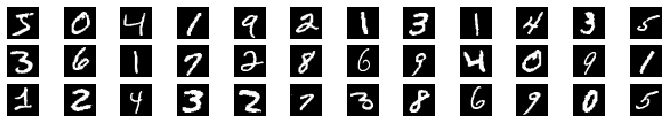

In [4]:
plt.figure(figsize=(12, 2))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.show()

## ***Model***

### *Define*

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

### *Compile*

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
__________________________________________________

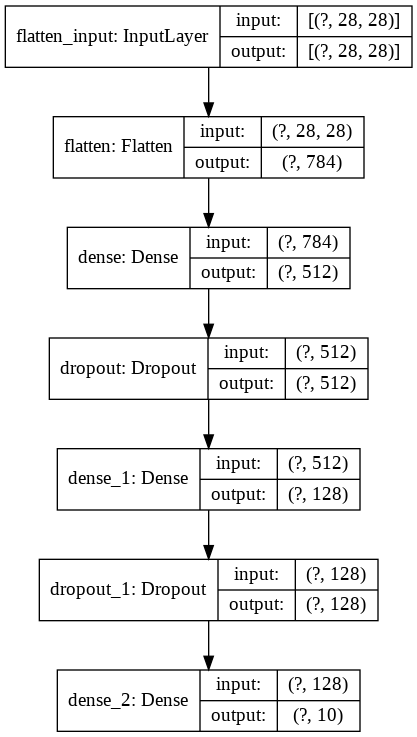

In [7]:
tf.keras.utils.plot_model(model, 'my_slp_model.png', show_shapes=True)

### *Fit*

Epoch 100/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.0036 - accuracy: 0.9987
CPU times: user 40.6 s, sys: 2.54 s, total: 43.1 s   
Wall time: 33.7 s  (@Notebook Setting/GPU)

In [8]:
%%time
hist = model.fit(x_train, y_train, batch_size=1000, epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.5862 - accuracy: 0.8273
Epoch 2/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.2144 - accuracy: 0.9371
Epoch 3/100
60000/60000 [==============================] - 0s 6us/sample - loss: 0.1514 - accuracy: 0.9554
Epoch 4/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.1176 - accuracy: 0.9649
Epoch 5/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.0946 - accuracy: 0.9717
Epoch 6/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.0789 - accuracy: 0.9765
Epoch 7/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.0681 - accuracy: 0.9797
Epoch 8/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.0574 - accuracy: 0.9825
Epoch 9/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.0502 - accuracy: 0.9847
Epoch 10/100


### *Evaluate*

In [9]:
model.evaluate(x_test,  y_test, verbose=0)

[0.08275740545424036, 0.9856]

## ***Analysis***

### *Plot*

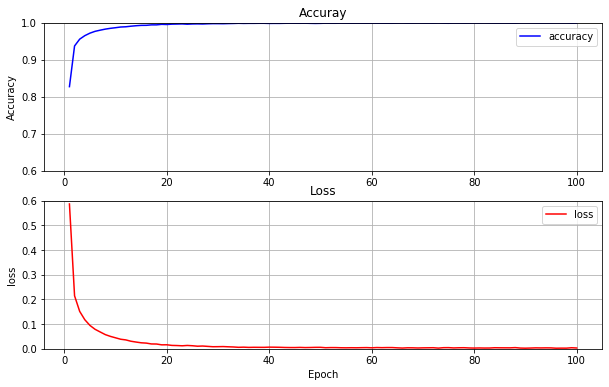

In [10]:
history_dict = hist.history
history_dict.keys()

loss = history_dict['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, hist.history['accuracy'], 'b', label='accuracy')
plt.grid(True)
#plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, hist.history['loss'], 'r', label='loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.0, 0.6])
plt.legend(loc='best')
plt.show()


### *Prediction*

In [11]:
# 테스트셋 첫 이미지 예측정보
print (model.predict(x_test[:1, :]))

[[3.7234671e-15 3.9515707e-11 1.7360856e-13 2.2921808e-12 1.3200521e-16
  1.2531474e-15 8.2486740e-18 1.0000000e+00 9.8522902e-16 8.1980023e-13]]


In [12]:
# 데스트셋 첫 이미지 분류
print (model.predict_classes(x_test[:1, :], verbose=0))

[7]


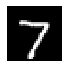

In [13]:
plt.figure(figsize=(1, 1))
plt.imshow(x_test[0], cmap='gray')
plt.grid(False)
plt.axis("off")
plt.show()

## ***File***

### *Save model*

In [0]:
model.save('my_mlp_model.hdf5')
# delete
del model

### *Load model*

In [15]:
from tensorflow.keras.models import load_model

model2 = load_model('my_mlp_model.hdf5')
print(model2.predict_classes(x_test[:1, :], verbose=0))

[7]


In [16]:
# chkeck a loaded mode
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
__________________________________________________

### *Tip*

- 로칼과의 다운로드과 업로드는 Colab의 왼편 창 Files brower를 이용하면 편리하다
- Colab과 내 구글드라이브('My Drive')를 연결시키고자 한다면 마운트한다

## ***실습과제***

### *과제1*

- #### *Dropout()을 빼서 학습시켜보라. 정확도에 변화가 있는가?*     
- #### *loss와 optimizer의 종류를 변경시켜 실험해 보라*    
- #### *학습 parameter 갯수를 유도해보라*

### *과제2*

- #### *그외 verbose 같은 개발을 돕는 옵션들도 변경해보자*